**Este es un caso de estudio para el certificado de Business Intelligence Data Analyst Career Path de Codecademy**  
Consiste en un **Analisis Exploratorio de Datos (EDA)**  
Basado en datos ficticios, inspirados en datos de **Biodiversidad en Parques Nacionales de EEUU**  
Por **Jairo Andrés Amaya Muñoz**

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Planteamiento del caso: Biodiversidad en Parques Nacionales de EEUU

La finalidad del proyecto es interpretar informacion de distintas especies de animales y plantas que se pueden encontrar en los Parques Nacionales y que muchos de ellos se encuentran en peligro de extincion. 

Los Parques Nacionales son precisamente areas protegidas por su belleza geografica y naturaleza o ecosistemas unicos. Analisis como el aca propuesto, ayudan a obtener informacion util para poder cuidar y propender por la preservacion de estas especies y de la biodiversidad.


## Preguntas para el analisis

Para enfocar el analisis nos plantean las siguientes preguntas:

- &#x0031;&#xFE0F;&#x20E3; ¿Cual es la distribucion del estado de conservacion de las especies?  
- &#x0032;&#xFE0F;&#x20E3; ¿Algunos tipos de especie tiene mayor probabilidad de estar en peligro?  
- &#x0033;&#xFE0F;&#x20E3; ¿Son las diferencias entre especies y su estado de conservacion significativas?  
- &#x0034;&#xFE0F;&#x20E3; ¿Cual es el animal mas prevalente y cual es su distribucion entre los parques?  


## Datos proporcionados

  
Nos proporcionan datos contenidos en dos archivos formato csv:

El primer archivo `species_info.csv` contiene informacion de las **especies en los parques nacionales**:

| Columna | Descripción |
| :--------------- | :--------------- |
| category | Categoria taxonomica de la especie |
| scientific_name | Nombre cientifico de la especie |
| common_names | Nombres comunes de la especie |
| conservation_status | Estado de conservacion de la especie |

    
El segundo archivo `observations.csv` contiene informacion de **avistamientos de especies en los parques nacionales durante un periodo de 7 dias** y sus columnas son:

| Columna | Descripción |
| :--------------- | :--------------- |
| scientific_name | Nombre cientifico de la especie |
| park_name | Nombre del parque nacional en que fue la especie fue avistada |
| observations |  Numero de avistamientos en un periodo de 7 dias |


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Importar librerias

In [1]:
import pandas as pd                   #Para trabajar con dataframes
import matplotlib.pyplot as plt       #Para graficar
import seaborn as sns                 #Una interfaz mas sofisticada y sencilla para los graficos

### Cargar los archivos de datos

In [2]:
species = pd.read_csv('species_info.csv')

observations = pd.read_csv('observations.csv')    #Quedan guardados como dos dataframes

In [3]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


### Descripción de valores, estadisticas resumen

In [5]:
species.describe(include='all')     #Nos brinda estadisticas de resumen, es este df todas son variables categoricas

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [6]:
species[species.scientific_name == 'Castor canadensis']
#Reviso el scientific_name mas frequente, para ver que el mismo animal esta registrado varias veces

,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",NaN
3050,Mammal,Castor canadensis,American Beaver,NaN
4475,Mammal,Castor canadensis,Beaver,NaN


In [7]:
species.scientific_name.value_counts()
#No es el unico caso, otros estan registrados varias veces

Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64

In [8]:
species[species.common_names == 'Brachythecium Moss' ]
#Para la variable common_names, hay varias especies(sicentific_name) conocidas por la gente del comun bajo el mismo nombre

,category,scientific_name,common_names,conservation_status
2812,Nonvascular Plant,Brachythecium digastrum,Brachythecium Moss,NaN
2813,Nonvascular Plant,Brachythecium oedipodium,Brachythecium Moss,NaN
2814,Nonvascular Plant,Brachythecium oxycladon,Brachythecium Moss,NaN
2815,Nonvascular Plant,Brachythecium plumosum,Brachythecium Moss,NaN
2816,Nonvascular Plant,Brachythecium rivulare,Brachythecium Moss,NaN
2817,Nonvascular Plant,Brachythecium rutabulum,Brachythecium Moss,NaN
2818,Nonvascular Plant,Brachythecium salebrosum,Brachythecium Moss,NaN


In [9]:
observations.describe(include='all')    #Estadisticas de resumen del otro df, en este, hay una variable numerica del # de observaciones

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [10]:
observations[observations.scientific_name == 'Myotis lucifugus']
#Revisando la especie(scientific_name) mas frecuente, se observan varios registros en diferentes parques y tambien en
#el mismo parque. Los registros sobre una misma especie y mismo parque deben ser en diferentes puntos del tiempo.

,scientific_name,park_name,observations
1603,Myotis lucifugus,Great Smoky Mountains National Park,57
7094,Myotis lucifugus,Yellowstone National Park,239
8308,Myotis lucifugus,Great Smoky Mountains National Park,59
9318,Myotis lucifugus,Bryce National Park,103
9738,Myotis lucifugus,Yosemite National Park,124
10759,Myotis lucifugus,Bryce National Park,108
11395,Myotis lucifugus,Great Smoky Mountains National Park,58
12562,Myotis lucifugus,Yellowstone National Park,233
13611,Myotis lucifugus,Yosemite National Park,134
15865,Myotis lucifugus,Bryce National Park,87


In [11]:
observations.scientific_name.value_counts()

Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific_name, Length: 5541, dtype: int64

In [12]:
summed_ob = observations.groupby(['scientific_name', 'park_name']).sum().reset_index()
summed_ob[summed_ob.scientific_name == 'Myotis lucifugus']
#Esto es prueba de que hay algunos registros de avistamientos sin agregar

,scientific_name,park_name,observations
13288,Myotis lucifugus,Bryce National Park,298
13289,Myotis lucifugus,Great Smoky Mountains National Park,174
13290,Myotis lucifugus,Yellowstone National Park,679
13291,Myotis lucifugus,Yosemite National Park,396


### Forma y tamaño de los dataframes, valores y valores nulos

In [13]:
#Numero de especies en cada df
print(species.scientific_name.nunique())
print(observations.scientific_name.nunique())

5541
5541


In [14]:
#Forma de cada df --> (filas, columnas)
print(species.shape)
print(observations.shape)

(5824, 4)
(23296, 3)


In [15]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [16]:
species.conservation_status.unique()
#Los valores nan para 'conservation_status' tienen un significado

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [17]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [18]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [19]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Observaciones de exploracion inicial

Hasta este punto se tiene una buena idea del contenido de los datasets y lo que representan, sus tamaños, forma y valores unicos y nulos.

Se puede decir que los datasets estan limpios, las variables estan bien nombradas y no hay valores nulos. En el dataframe de **species** hay valores nulos pero se puede decir que son valores estructuralmente faltantes, porque quieren decir algo. En este caso los valores nulos en 'conservation_status' quieren decir que estas especies no estan en peligro.

Para completar el buen estado de los datasets, se observo que hay el mismo numero de especies en ambos. Pero mas alla de eso, hay una cosa que llama la atencion y es que para **observations**: *hay avistamientos de especies registradas que (se asume) son de varios momentos, sin estar agregados*.  
Es bueno tener esto presente sabiendo que pueden haber varios registros para una misma especie en un mismo parque.


## Descripcion de variables principales


Avanzando en la exploracion de los datos proporcionados, las variables principales son: 
> Las **Especies** por Nombre Cientifico (variable categorica nominal), son 5541.

> Las **Categorias** de especies (variable categorica nominal), son Mamiferos, Pajaros, Reptiles, Anfibios, Peces, Plantas Vasculares y Plantas No Vasculares.

> los **Parques Naturales** (variable categorica nominal), son 'Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park' y 'Yellowstone National Park'.

> El **Estado de Conservacion** de las especies (variable categorica ordinal), estos son NaN > 'Species of Concern' > 'Threatened' > 'In Recovery' > 'Endangered'.   (Orden por evaluar)

> Los **Numeros de Avistamientos** en un periodo de 7 dias (variable numerica discreta), en un rango de 9 a 321, en promedio de a 142,3 por registro.


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Conversion de valores nulos

In [20]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [21]:
#Llenamos los valores nulos de 'conservation_status' con 'No Concern' para ser claros con el significado
#de estos datos estructuralmente faltantes y que se comprenda y no alarme a un lector comun
species.conservation_status.fillna('No Concern', inplace=True) 
species.conservation_status.unique()

array(['No Concern', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [22]:
species.conservation_status.value_counts() #La mayoria de especies no estan en riesgo de extincion

No Concern            5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

### Visualizacion de categorias de Estado de Conservacion y de Especies 
(Pregunta &#x0031;&#xFE0F;&#x20E3;) 


<Axes: xlabel='conservation_status', ylabel='count'>

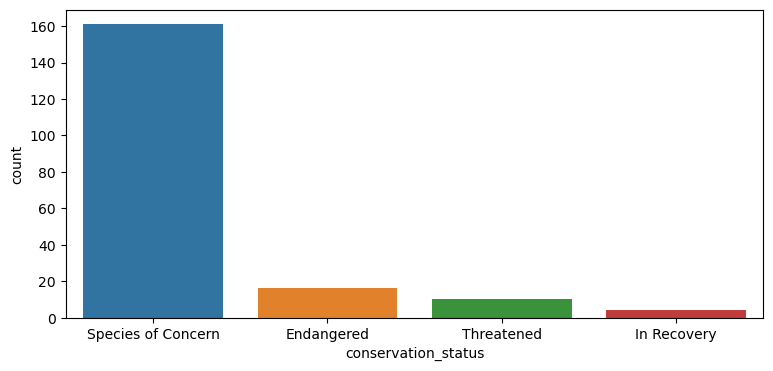

In [64]:
#Ahora una visualizacion de las especies que tienen algun tipo de riesgo (excluyendo 'No Concern') 
plt.figure(figsize=(9,4))

#Se crea un df de species excluyendo las especies con valor 'No Concern' en la 
#variable 'conservation_status' porque esta barra diminutiza a las de otras categorias.
species_risk = species[species.conservation_status != 'No Concern']


sns.countplot(x=species_risk.conservation_status)


# PENDIENTE ORDENAR ESTAS CATEGORIAS SEGUN SU ORDEN ORDINAL, O SOLO EN EL GRAFICO


Se observa que la mayoria de las epecies con estado de conservacion en riesgo (Excluyendo 'No Concern'), lo estan en la categoria 'Species of Concern', afortunadamente la menos grave en cuanto a riesgo de extincion.

Las categorias que deben preocuparnos son las de 'Threatened' y 'Endangered' puesto que significan que estas especies enfrentan un alto riesgo de extincion. 

Por otro lado, que hayn especies 'In Recovery' es una buena noticia, que puede indicar que los esfuerzos de conservacion en los parques nacionales funcionan.



La variable de **conservation_status** es critica en este proyecto de analisis. Por eso se ha de mencionar que es una variable categorica ordinal, pues hay estados de conservacion que indican mayor o menor preocupacion por la conservacion y posibilidad de extincion de las especies. El orden de las categorias lo asumimos mirando las clasificaciones oficiales mas utilizadas, como lo son NatureServe Rank y IUCN Red List Category: [Comparacion de Clasificaciones de Riesgo de Extincion.](https://www.researchgate.net/figure/Comparison-of-NatureServe-Ranks-and-IUCN-Red-List-Categories_fig1_359830951)

**El orden de conservation_status asumido es:**  'Species of Concern' **<** 'Threatened' **<** 'In Recovery' **<** 'Endangered'


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

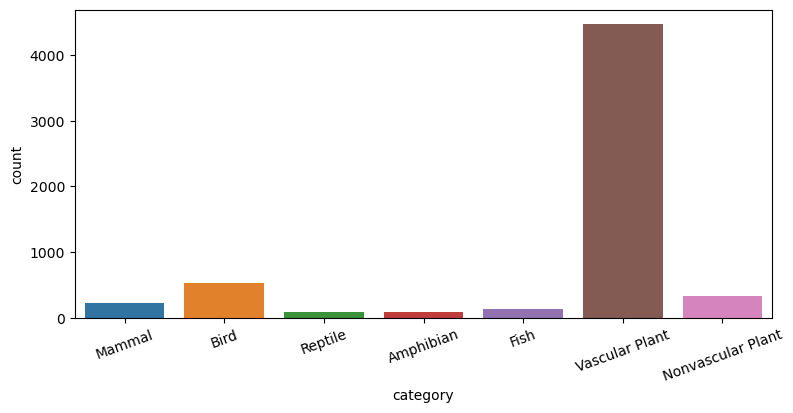

In [51]:
plt.figure(figsize=(9,4))
sns.countplot(x=species.category)
plt.xticks(rotation=20)
#Hay muchas mas plantas vasculares que cualquier otro tipo de animal o planta
#species.category[species.category == 'Bird'].count() es igual a 521

Acerca de las categorias de especies cabe decir que hay un numero muy alto de especies de plantas vasculares, mas de 8 veces que las demas categorias (por encima de 4000 al lado de la siguiente mas frecuente, los pajaros, que son 521).

Luego hay mayor numero de especies de pajaros, plantas no-vasculares y mamiferos.

### Visualizacion de Estado de Conservacion y Categoria de Especie
(Pregunta &#x0032;&#xFE0F;&#x20E3;)

Despues de visualizar **estado de conservacion** y por **categoria de especie**, se explora la relacion entre estas dos variables. Para eso usaremos barras apiladas dado que las dos son variables categoricas.

La variable de estado de conservacion es variable categorica y ademas ordinal, por lo que ordenaremos sus valores(categorias) para que esto sea un elemento que ayude a visualizar el riesgo que tienen algunas especies.

In [53]:
#Para las barras apiladas (stacked bar plot), requerimos crear una tabla "pivoteada" (df de 2 dimensiones) donde se vea
#el conteo de acuerdo a la categoria de especie (columna) y al estado de conservacion (fila).

#Se agrupan los datos de una tabla "estandar o tidy, limpia", excluyendo 'No concern' (df species_risk)
#Se cuentan los registros de cada "grupo"
#Se incluyen los indices en la tabla (nombres de los "grupos")
#Se "pivotea" la tabla pues en este formato la recibe la funcion .plot

a = species_risk.groupby(['category', 'conservation_status'])\
    .scientific_name.count().reset_index()\
    .pivot(index='category', columns='conservation_status', values='scientific_name')
#esta tabla es el resultado

#Se reordenan las columnas que son los valores de 'category' de acuerdo a su orden de variable categorica ordinal
b = a[['Species of Concern', 'Threatened', 'In Recovery', 'Endangered']]
b

conservation_status,Species of Concern,Threatened,In Recovery,Endangered
category,,,,
Amphibian,4.0,2.0,NaN,1.0
Bird,72.0,NaN,3.0,4.0
Fish,4.0,4.0,NaN,3.0
Mammal,28.0,2.0,1.0,7.0
Nonvascular Plant,5.0,NaN,NaN,NaN
Reptile,5.0,NaN,NaN,NaN
Vascular Plant,43.0,2.0,NaN,1.0


In [54]:
#Este df de 2 dimensiones se transpone para utilizar en otra visualizacion complementaria
c = b.transpose()
c

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0


Text(0, 0.5, 'count')

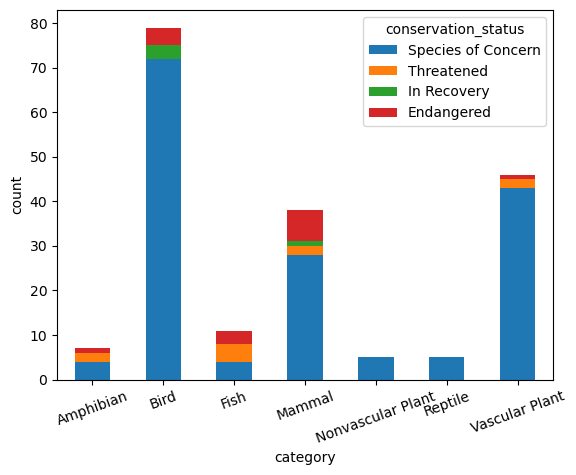

In [55]:
b.plot(kind='bar', stacked=True)
plt.xticks(rotation=20)
plt.ylabel('count')

#Una vez graficado el primero observamos cual categoria de especie es la que tiene mas especies en riesgo de extincion
#y notamos que hay muchos pajaros a pesar de que no sean mayoria de las especies, la mayoria de las especies son plantas vasculares.

#Vale la pena reocrdar que hay 5541 especies registradas y esta cuenta va hasta las 70

Podemos ver que la categoria de especie con mas especies en riesgo es la de Pajaros, la segunda Plantas Vasculares y la tercera los Mamiferos. Recordemos que las Plantas Vasculares y despues los Pajaros eran las categorias con mayor numero de especies.

**Los Pajaros estan sobrerepresentados en especies en riesgo de extincion, de acuerdo a su estado de conservacion.**

Text(0, 0.5, 'count')

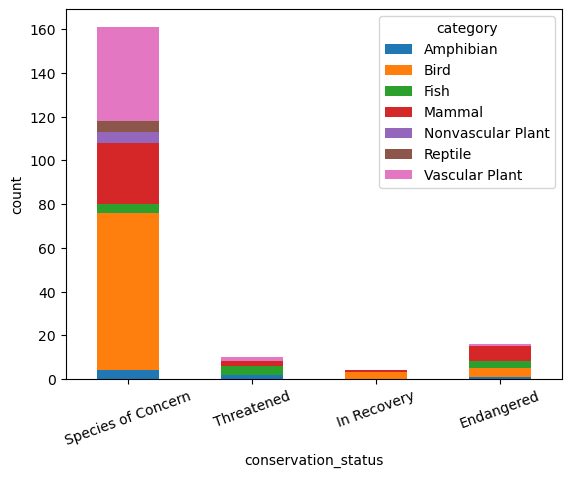

In [44]:
c.plot(kind='bar', stacked=True)
plt.xticks(rotation=20)
plt.ylabel('count')

Como se dijo, esta variable de Estado de Conservacion, se ordenó. La mayoria son Especies Preocupantes ('Species of Concern'), esto se habia visto antes. Tambien como antes, se observa que los Pajaros y las Plantas Vasculares "sobresalen" en Especies Preocupantes.

Por otro lado se ve que **en especies en verdadero Peligro ('Endangered'), sobresalen los Mamiferos, Pajaros y Peces. Y los Anfibios, que se ven, aunque sabemos que son poco numero de especies.**

A hypothesis could be that this three categories of living beens are in danger due to different causes. Since the characteristic of birds is that they travel vast distances, mammals can actually be hunted and for vascular plants a possible explanation may be more complex. * nota

### Animal mas prevalente y estado de conservacion 
Pregunta &#x0034;&#xFE0F;&#x20E3;

es necesario hacer un join, incluir la variable category en la tabla observations
excluir las plantas no vasculares y vasculares para quedar solo con los animales
despues se puede hacer un value count

y con ese df, ver el animal o animales mas prevalentes, donde se hallan (en que parque)


In [78]:
#Numero de especies en cada df
print(species.scientific_name.nunique())
print(observations.scientific_name.nunique())
# habiamos visto que hay un mismo numero de especies en ambos df pero hay repetidos en algunos, distintos para cada df
# entonces se estaria dando en ciertos registros de scientific_name relaciones de uno a muchos o muchos a uno o muchos a muchos

5541
5541


In [79]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [80]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern
1,Mammal,Bos bison,"American Bison, Bison",No Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Concern
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Concern
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Concern
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Concern


In [ ]:
observations.scientific_name.value_counts()

In [88]:
observations_merge = pd.merge(observations, species, on=['scientific_name', 'scientific_name']).shape
observations_merge

(25632, 6)

Hay que evitar el producto cartesiano al hacer join(merge function) entre los dos df, consultar sobre la funcion map.
La relacion es de muchos a muchos en scientific_name entre los dos df.

Tambien pensar en como hacer para quitar los registros repetidos (repetidos por un mismo scientific_name), scientific_name deberia ser el primary key de la tabla.